In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=500, noise=.3, random_state=2)

In [4]:
def plotDataset(x, y, axes):
    plt.plot(x[y==0, 0], x[y==0, 1], 'ro', markersize=3)
    plt.plot(x[y==1, 0], x[y==1, 1], 'g^', markersize=3)
    plt.axis(axes)
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$x_2$', fontsize=18, rotation=0)


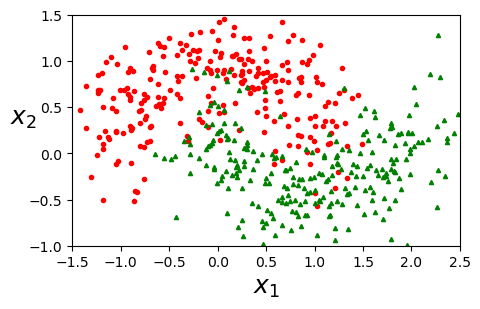

In [5]:
plt.figure(figsize=(5, 3))
plotDataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=1)

In [7]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

treeClf = DecisionTreeClassifier(random_state=1)
treeClf.fit(xTrain, yTrain)
treeClf.score(xTrain, yTrain)

1.0

In [8]:
#Bagging

from sklearn.ensemble import BaggingClassifier

baseClf = DecisionTreeClassifier()
bagClf = BaggingClassifier(baseClf, n_estimators=500, max_samples=100, max_features=2, bootstrap=True, bootstrap_features=False, oob_score=True, random_state=1)
bagClf.fit(xTrain, yTrain)
bagClf.score(xTrain, yTrain)

0.9413333333333334

In [9]:
bagClf.score(xTest, yTest)

0.896

In [10]:
#OOB score

bagClf.oob_score_

0.9093333333333333

In [11]:
bagClf.oob_decision_function_[:3]

array([[0.25125628, 0.74874372],
       [0.935     , 0.065     ],
       [0.05154639, 0.94845361]])

In [12]:
#Decision boundary

def plotDecisionBoundary(clf, x, y, axes=[-1.5, 2.45, -1, 1.5]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    xNew = np.c_[x1.ravel(), x2.ravel()]
    yPred = clf.predict(xNew).reshape(x1.shape)
    
    plt.contourf(x1, x2, yPred, alpha=.2)
    plt.contour(x1, x2, yPred)
    
    plotDataset(x, y, axes)

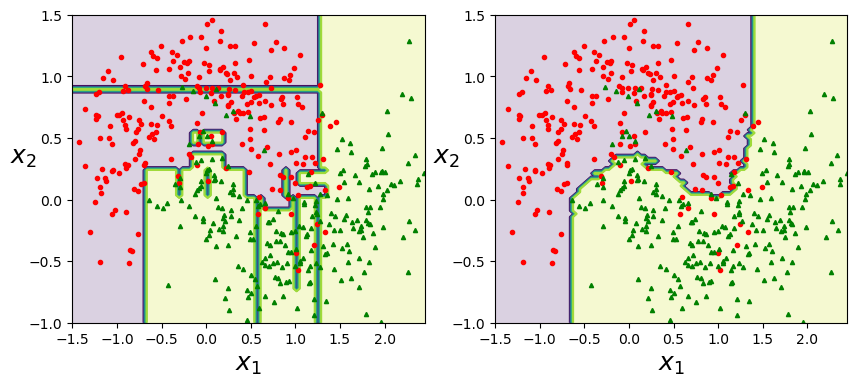

In [13]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plotDecisionBoundary(treeClf, x, y)
plt.subplot(122)
plotDecisionBoundary(bagClf, x, y)
plt.show()

In [17]:
bagClf = BaggingClassifier(baseClf, n_estimators=500, max_samples=100, max_features=2, bootstrap=True, bootstrap_features=False, oob_score=True, random_state=1)

In [18]:
bagClf

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=2,
                  max_samples=100, n_estimators=500, oob_score=True,
                  random_state=1)